In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Airline Dataset.csv')
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [5]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [6]:
df = df.drop(['First Name', 'Last Name', 'Airport Name', 'Country Name', 'Airport Continent', 'Pilot Name'], axis=1)

In [7]:
df.head()

,Passenger ID,Gender,Age,Nationality,Airport Country Code,Continents,Departure Date,Arrival Airport,Flight Status
0,10856,Female,62,Japan,US,North America,6/28/2022,CXF,On Time
1,43872,Male,62,Nicaragua,CA,North America,12/26/2022,YCO,On Time
2,42633,Male,67,Russia,FR,Europe,1/18/2022,GNB,On Time
3,78493,Female,71,China,CA,North America,9/16/2022,YND,Delayed
4,82072,Male,21,China,US,North America,2/25/2022,SEE,On Time


In [8]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.astype(str)
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(['Flight Status'], axis=1).values
y = df['Flight Status'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1/3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [11]:
from sklearn.metrics import mean_squared_error
y_pred = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
mse = np.sqrt(tree_mse)
print('RMSE on validation set: ', mse)

RMSE on validation set:  0.817938996659728


In [12]:
from sklearn.metrics import r2_score
print('R2 score on validation set: ', r2_score(y_test, y_pred))

R2 score on validation set:  -0.003081065846147313


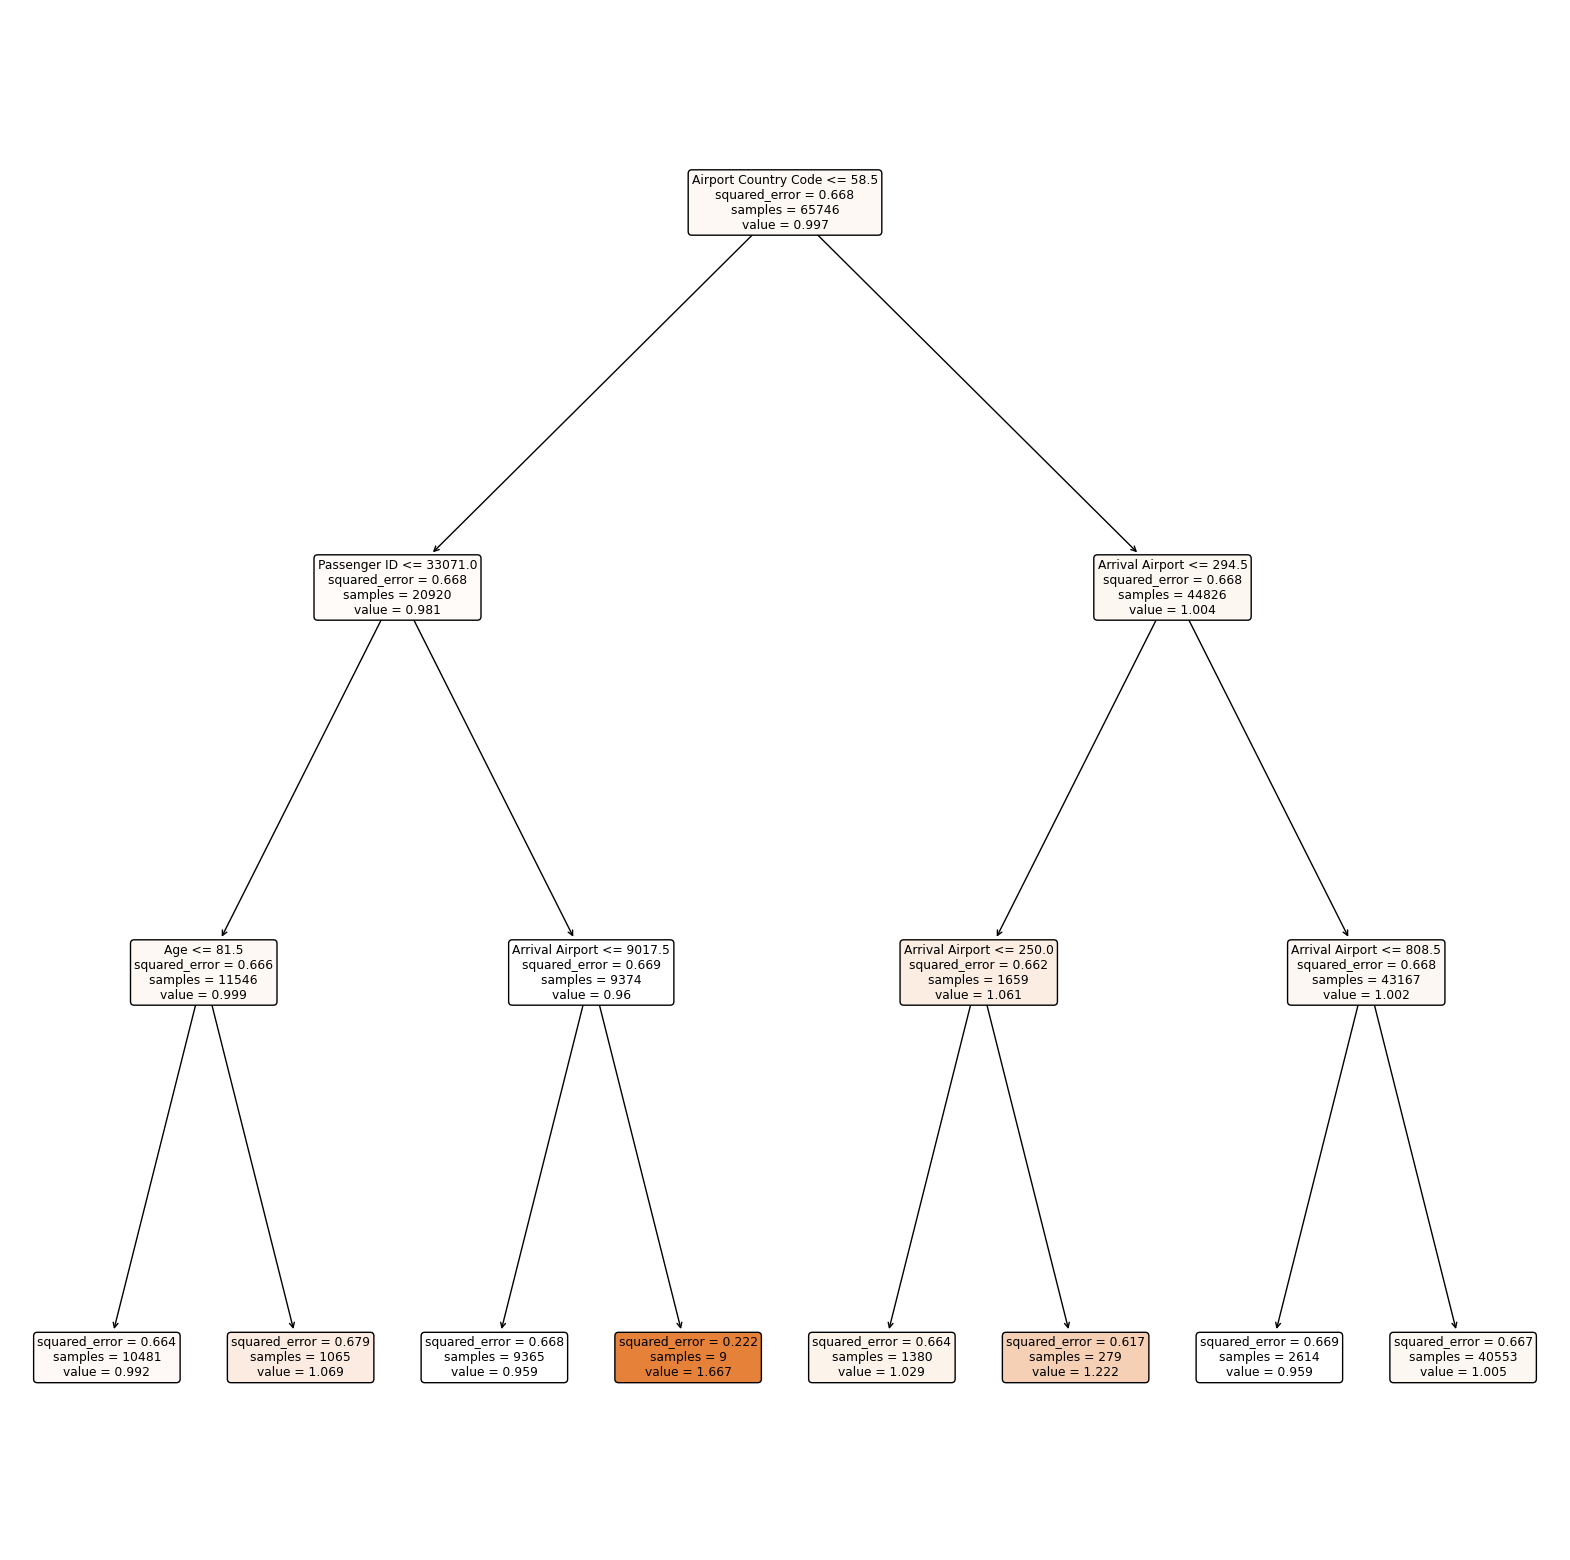

In [13]:
# build the tree
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train, y_train)

# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(dtree, filled=True, rounded=True, feature_names=df.columns)
plt.show()

In [14]:
#k-fold cross validation (k=10) 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print('RMSE scores: ', rmse_scores)
print('Mean: ', rmse_scores.mean())
print('Standard deviation: ', rmse_scores.std())

RMSE scores:  [0.81139024 0.8214735  0.81655828 0.81558334 0.81796361 0.81433061
 0.81404732 0.81650072 0.82442301 0.82165052]
Mean:  0.8173921155870131
Standard deviation:  0.0038196369587907334


In [15]:
#random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=3)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [17]:
#grid search test
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_depth': [1, 2, 3, 4, 5]}
]
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
#grid search visualization
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.8172555662341193 {'max_depth': 1, 'n_estimators': 3}
0.817194958360998 {'max_depth': 1, 'n_estimators': 10}
0.817182141217 {'max_depth': 1, 'n_estimators': 30}
0.8171909482636516 {'max_depth': 1, 'n_estimators': 100}
0.8172215540785037 {'max_depth': 2, 'n_estimators': 3}
0.8172714578112391 {'max_depth': 2, 'n_estimators': 10}
0.8171958000495667 {'max_depth': 2, 'n_estimators': 30}
0.8172086650066794 {'max_depth': 2, 'n_estimators': 100}
0.8175000432204101 {'max_depth': 3, 'n_estimators': 3}
0.8172941040625333 {'max_depth': 3, 'n_estimators': 10}
0.8173083157264615 {'max_depth': 3, 'n_estimators': 30}
0.8172563262811777 {'max_depth': 3, 'n_estimators': 100}
0.8177106415527319 {'max_depth': 4, 'n_estimators': 3}
0.8173992068021824 {'max_depth': 4, 'n_estimators': 10}
0.8173578455259892 {'max_depth': 4, 'n_estimators': 30}
0.817327850331586 {'max_depth': 4, 'n_estimators': 100}
0.8181849091220013 {'max_depth': 5, 'n_estimators': 3}
0.8175620595758083 {'max_depth': 5, 'n_estimators': 10}